---

### Student Information
Name:

Student ID: 111061643

GitHub ID: yuyangdanny

---

### Instructions
1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [193]:
### Begin Assignment Here
# Import requirments
import pandas as pd

# Second part

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [194]:
# categories
Sentiment = ['positive', 'negative']

In [195]:
# Write down the correct raw file path
file_paths = ["../sentiment_labelled_sentences/amazon_cells_labelled.txt", "../sentiment_labelled_sentences/imdb_labelled.txt", "../sentiment_labelled_sentences/yelp_labelled.txt"]
dps = []
for file_path in file_paths:
    if file_path == file_paths[1]:
        sep = ' ' * 2
    else:
        sep = '\t'
    df = pd.read_csv(file_path, sep=sep, header=None, names=['Sentence', 'Score']) 
    dps.append(df)
    print(file_path.split('/')[-1], "have size of: ", df.shape)

df = pd.concat(dps, ignore_index=True)

# Specify the path where you want to save the combined dataset.
combined_file_path = 'combined_dataset.txt'

# Save the combined DataFrame to a new file.
df.to_csv(combined_file_path, sep='\t', index=False)

amazon_cells_labelled.txt have size of:  (1000, 2)
imdb_labelled.txt have size of:  (1000, 2)
yelp_labelled.txt have size of:  (1000, 2)


/tmp/ipykernel_17914/2215067109.py:9: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



## 3. Data Transformation

### Read dataset and Adding Columns

In [196]:

file_path = "./combined_dataset.txt"
df = pd.read_csv(file_path, sep='\t', header=None, names=['Sentence', 'Score']) 
df['Sentiment'] = df['Score']
df.loc[df["Score"] == '1', "Sentiment"] = 'positive'
df.loc[df["Score"] == '0', "Sentiment"] = 'negative'
df['Sentiment'].iloc[0] = 'Sentiment'
df = df[1:].reset_index(drop=True)

Exercise: Let's take at look some of the data that are contained in our subset of the data

In [197]:
def print_k_sample_text_data(data, k):
    ''' Print out the top k data
        - args:
            - data: List of dataset
            - k: Number of sample to print out
    '''
    for d in data[: k]:
        print(d)

print_k_sample_text_data(df.values.tolist(), 3)

['So there is no way for me to plug it in here in the US unless I go by a converter.', '0', 'negative']
['Good case, Excellent value.', '1', 'positive']
['Great for the jawbone.', '1', 'positive']


---

### 3.1 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [200]:
# a simple query
df[:10][["Sentence","Sentiment"]]

,Sentence,Sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


#### Let's query the last 10 records

In [201]:
df[-10:]

,Sentence,Score,Sentiment
2990,The refried beans that came with my meal were ...,0,negative
2991,Spend your money and time some place else.,0,negative
2992,A lady at the table next to us found a live gr...,0,negative
2993,the presentation of the food was awful.,0,negative
2994,I can't tell you how disappointed I was.,0,negative
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative
2999,"Then, as if I hadn't wasted enough of my life ...",0,negative


Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [202]:
#Answer here
def filter_rows(df):
    df.head(10)
filter_rows(df)


---

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the positive category, and query every 10th record. Only show the first 5 records.

In [203]:
# Answer here
df[df['Sentiment'] == 'positive'].iloc[::10][0:5]

,Sentence,Score,Sentiment
1,"Good case, Excellent value.",1,positive
21,I bought this to use with my Kindle Fire and a...,1,positive
44,Excellent bluetooth headset.,1,positive
61,I really recommend this faceplates since it lo...,1,positive
78,"I love this phone , It is very handy and has a...",1,positive


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

In [270]:
# check missing values
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter += 1
    return ("The amoung of missing records is: ", counter)

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [205]:
# Answer here
df.isnull().apply(lambda x: check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### Drop nan value

In [206]:
print("Size before delete:", df.shape)
df.dropna(inplace=True)
print("Size after delete:", df.shape)

Size before delete: (3000, 3)
Size after delete: (3000, 3)


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [207]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [208]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [209]:
# Answer here
'''
isnull() Return a boolean same-sized object indicating if the values are NA, NA values, such as None or numpy.nan, gets mapped to True values. 
And that is why id A,B,E are True.

And Everything else gets mapped to False values.
So Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).
That's why id C,D,F are False.
'''

'''
The defination is from reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
'''

# The revised version
def detect_none(data, *token):
    for item in data:
        if (
            'missing_example' not in item or item['missing_example'] in token
        ):
            item['missing_example'] = None

detect_none(NA_dict, 'NaN', 'None', '')
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
NA_df['missing_example'].isnull()


  id  missing_example
0  A              NaN
1  B              NaN
2  C              NaN
3  D              NaN
4  E              NaN
5  F              NaN


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

---

### 4.2 Dealing with Duplicate Data

Let's check how many duplicated data, and after that, we delete the duplicates

In [210]:
print("Number of total duplicated before drop it: ", sum(df.duplicated()))
df.drop_duplicates(keep='first', inplace=True)
print("Number of total duplicated after drop it: ", sum(df.duplicated()))

Number of total duplicated before drop it:  18
Number of total duplicated after drop it:  0


---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [211]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=42) #random state
display(df_sample)

(2982, 3)


,Sentence,Score,Sentiment
2423,We've tried to like this place but after 10+ t...,0,negative
1559,The best example of how dumb the writing is wh...,0,negative
889,It was that loud.Glad to say that the Plantron...,1,positive
332,The reception is excellent!,1,positive
2239,"Everyone is very attentive, providing excellen...",1,positive
...,...,...,...
926,It looses connection to the phone even when it...,0,negative
1222,Mishima is extremely uninteresting.,0,negative
2728,The Han Nan Chicken was also very tasty.,1,positive
2470,"Very good, though!",1,positive


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [212]:
# Answer here
print("Origin data information:")
print(df.groupby("Sentiment")["Sentiment"].count())
print()
print("Sample data information:")
print(df_sample.groupby("Sentiment")["Sentiment"].count())

Origin data information:
Sentiment
negative    1492
positive    1490
Name: Sentiment, dtype: int64

Sample data information:
Sentiment
negative    508
positive    492
Name: Sentiment, dtype: int64


As we can see that thg dataframe has been randomised to have only 1000 samples out of the original 3000 samples. <br>
Apart from that we can aslo notice that the distribution of data has not been changed. <br>
Even though we have less samples in datasets the representation of samples is preserved quite well.

---

# Third Part - 1 (Vusulization)

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

508
Sentiment
negative    508
positive    492
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='Sentiment'>

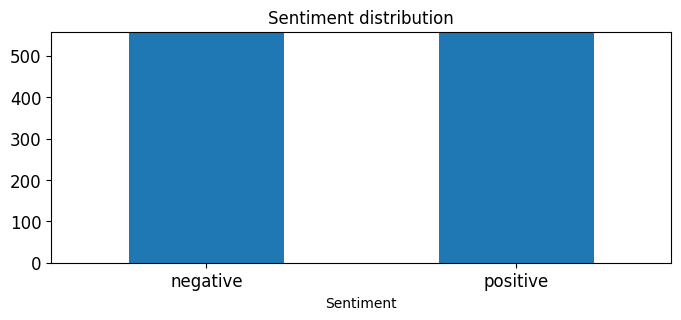

In [214]:
# Answer here
print(max(df_sample.Sentiment.value_counts()))
upper_bound = max(df_sample.Score.value_counts() + 50)
print(df_sample.Sentiment.value_counts())

df.Sentiment.value_counts().plot(
    kind='bar', title='Sentiment distribution', ylim=[0, upper_bound],
    rot=0, fontsize=12, figsize=(8,3)
)

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

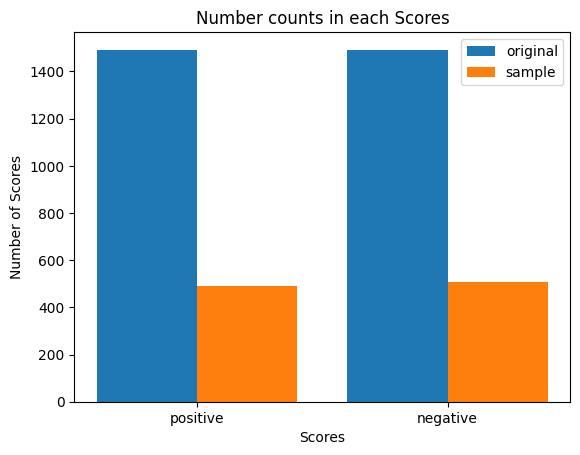

In [215]:
# Answer here

import seaborn as sns
data_1=df.Sentiment.value_counts().reindex(Sentiment)
data_2=df_sample.Sentiment.value_counts().reindex(Sentiment)
count_1 = data_1.array
count_2 = data_2.array

X_axis = np.arange(len(Sentiment)) 
plt.bar(X_axis-0.2, count_1, 0.4, label = 'original')
plt.bar(X_axis+0.2, count_2, 0.4, label = 'sample')
plt.xticks(X_axis, Sentiment);
plt.xlabel("Scores");
plt.ylabel("Number of Scores");
plt.title("Number counts in each Scores");
plt.legend();
plt.show();

---

### 5.2 Feature Creation

In [216]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/Yuyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [218]:
df['unigrams'] = df['Sentence'].apply(lambda x: tokenize_text(x))

In [219]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [220]:
df[0:4]

,Sentence,Score,Sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


---

### 5.3 Feature subset selection

In [221]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.Sentence)
print(X_counts.shape)
print(X_counts[0])

(2982, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [222]:
analyze = count_vect.build_analyzer()
analyze(df.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [223]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [224]:
# Answer here
# How do we turn our array[0] Sentence document into a tokenized text using the build_analyzer()?
analyze(df.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

In [225]:
analyze(" ".join(list(df[:1].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

Now let us look at the term-document matrix we built above.

In [226]:
# We can check the shape of this matrix by:
X_counts.shape

(2982, 5155)

In [227]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [228]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [229]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**?
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [230]:
# Answer here
hot_idx = []
for i, hot_point in enumerate(X_counts[0:5, 0:100].toarray()[4]):
    if hot_point == 0:
        continue
    else:
        hot_idx.append(i)

for idx in hot_idx:
    print(count_vect.get_feature_names_out()[idx])

---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [231]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [232]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [233]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


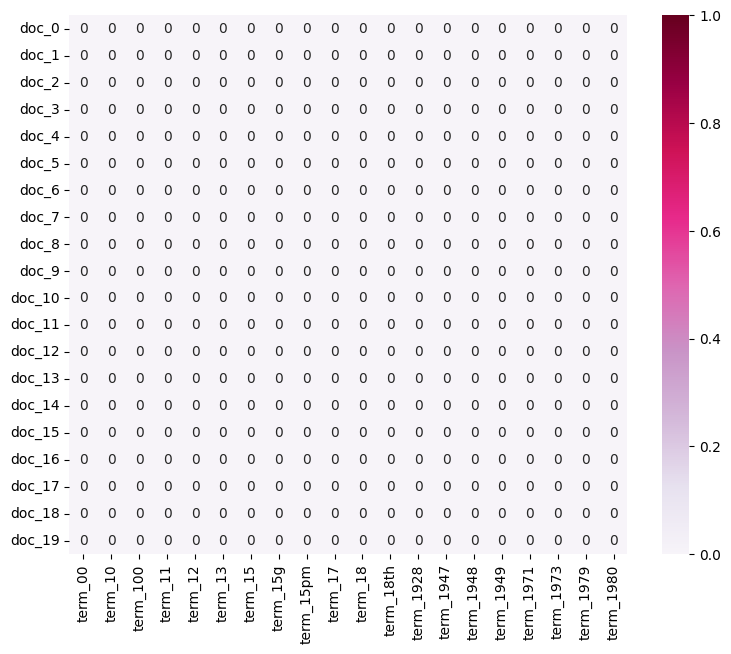

In [234]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

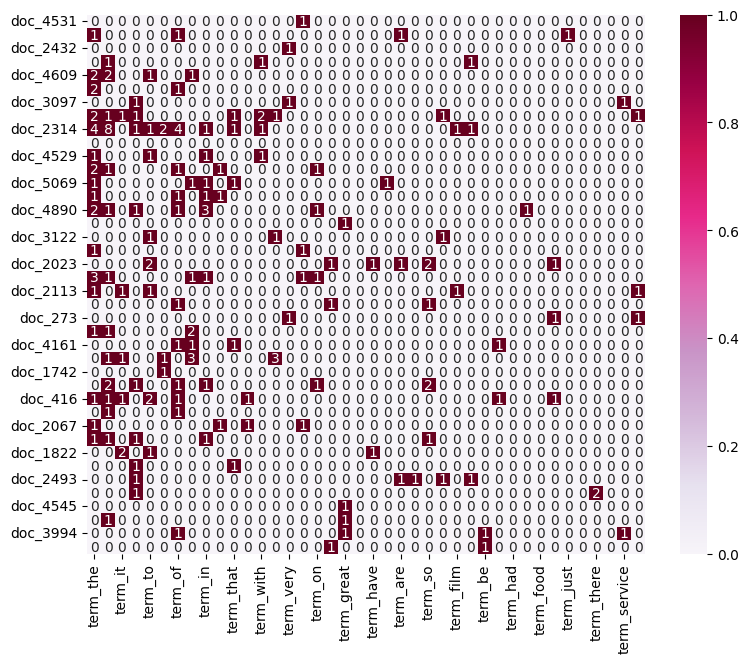

In [332]:
# Answer here
import random
k = 40
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

sorted_term_frequencies = sorted(enumerate(term_frequencies), key=lambda x: x[-1], reverse=True)
term_idx = [i for i, _ in sorted_term_frequencies[: k]]
random_record_idx = [i for i in random.sample(range(0, X_counts.shape[0]), k)]


sample_x = count_vect.get_feature_names_out()[term_idx]
plot_x = ["term_"+str(i) for i in sample_x]
plot_y = ["doc_"+ str(i) for i in term_idx]

plot_z = []
X_counts.shape


for i in random_record_idx:
    current_row = []
    for j in term_idx:
        current_row.append(X_counts[i, j])
    plot_z.append(current_row)
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


Because there are a large number of terms, I am sorting them by term frequency, starting with the highest frequency. <br>
After sorting, I will sample a subset of the terms. Once I have sampled these terms, I will plot them to ensure that my visualized data is the most meaningful.

### Naive Bayes classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

---

### 5.4 Dimensionality Reduction

In [236]:
from sklearn.decomposition import PCA

In [237]:
print(X_counts.shape)
X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2982, 5155)
(2982, 2)


### Visualize 2D

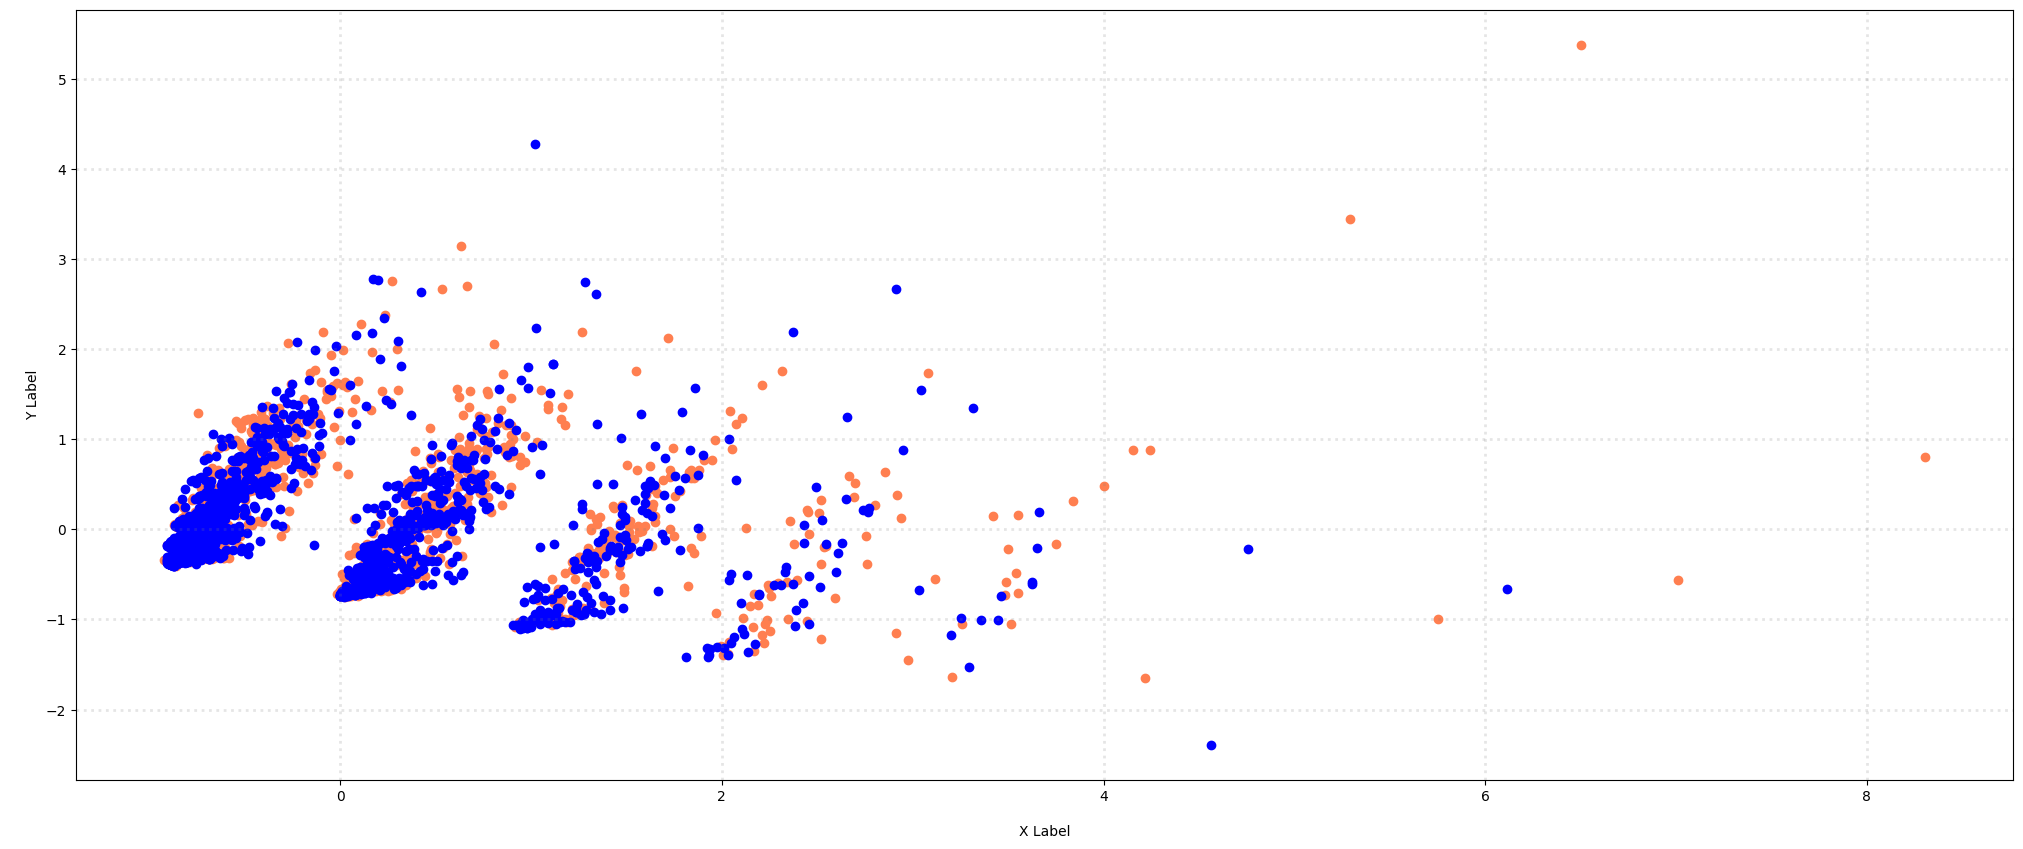

In [238]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, Sentiment):
    xs = X_reduced[df['Sentiment'] == category].T[0]
    ys = X_reduced[df['Sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.
### Visualize 3D

(2982, 3)


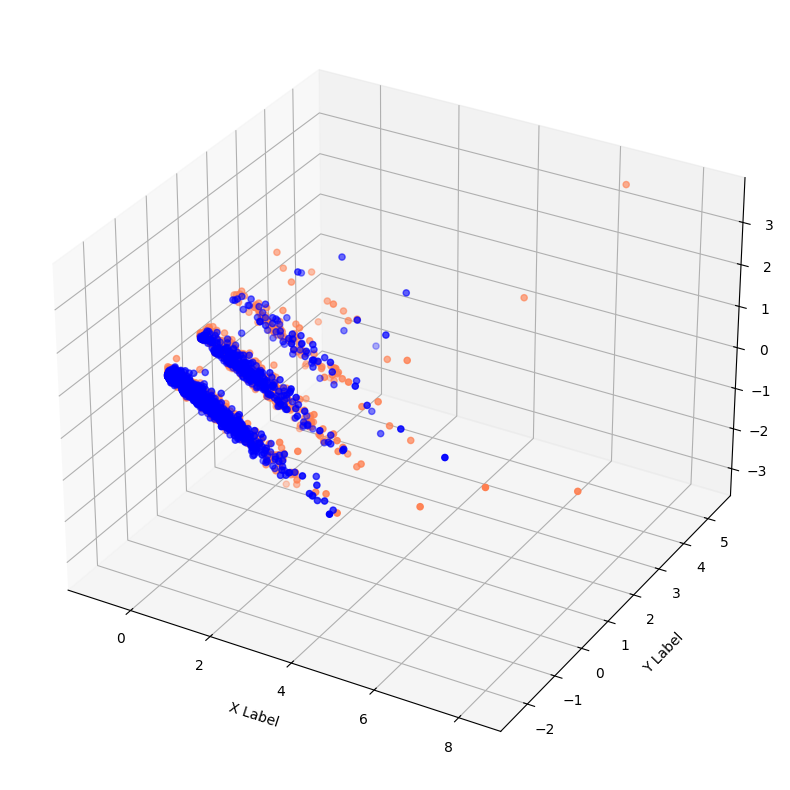

In [239]:
# Answer here
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3d.shape)

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, Sentiment):
    xs = X_reduced_3d[df['Sentiment'] == category].T[0]
    ys = X_reduced_3d[df['Sentiment'] == category].T[1]
    zs = X_reduced_3d[df['Sentiment'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


---

### 5.5 Attribute Transformation / Aggregation

In [240]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

5155


In [241]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [242]:
term_frequencies[0] #sum of first term: 00

1

/tmp/ipykernel_17914/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



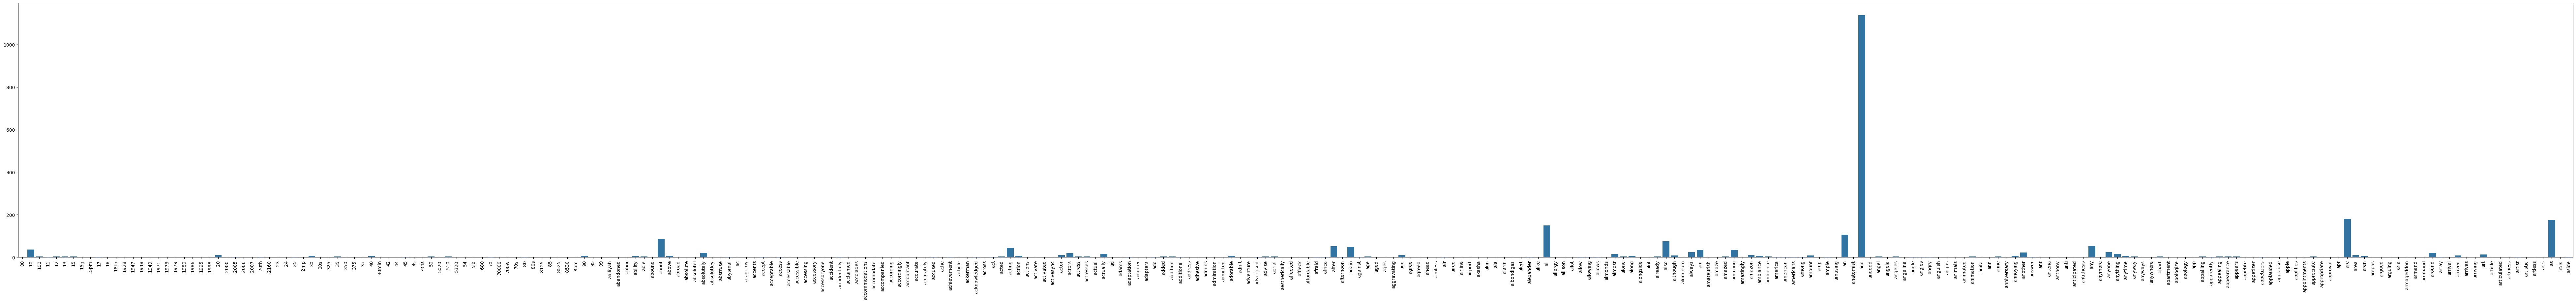

In [243]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [244]:
# Answer here
import plotly.express as px
d = {'term_name': count_vect.get_feature_names_out()[:300], 'count': term_frequencies[:300]}
dateframe = pd.DataFrame(data=d)

fig = px.bar(dateframe, x='term_name', y='count')
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [245]:
# Answer here
d = {'term_name': count_vect.get_feature_names_out()[:30], 'count': term_frequencies[:30]}
dateframe = pd.DataFrame(data=d)

fig = px.bar(dateframe, x='term_name', y='count')
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [246]:
# Answer here
sort_idx, sort_count = [], []
sort_freq = sorted(enumerate(term_frequencies), key=lambda i: i[1], reverse=True)
for idx, count in sort_freq:
    sort_idx.append(idx)
    sort_count.append(count)
sort_term = count_vect.get_feature_names_out()[sort_idx]

d = {'term_name': sort_term[:30], 'count': sort_count[:30]}
dateframe = pd.DataFrame(data=d)

fig = px.bar(dateframe, x='term_name', y='count')
fig.show()


---

### Transform the values in that vector into the log distribution.

In [247]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_17914/3142897423.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



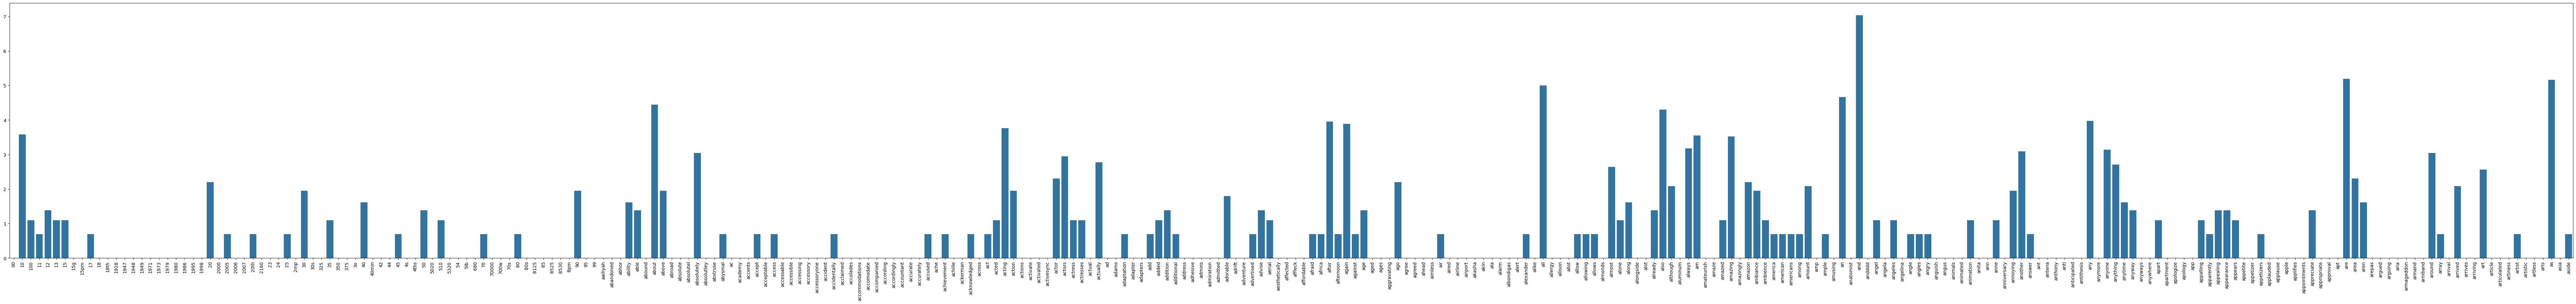

In [248]:
plt.subplots(figsize=(100, 10));
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300]);
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization

In [249]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [256]:
# Take the prepared dataset from df as training set
X = df

In [257]:
mlb = preprocessing.LabelBinarizer()

In [258]:
mlb.fit(X.Sentiment)

LabelBinarizer()

In [259]:
X['bin_Sentiment'] = mlb.transform(X['Sentiment']).tolist()

In [260]:
X[0:9]

,Sentence,Score,Sentiment,unigrams,bin_Sentiment
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `Sentiment` column instead. Does it work?

In [262]:
# Answer here
X['bin_Sentiment'] = mlb.transform(X['Sentiment']).tolist()
X[0:10]
# does not work


,Sentence,Score,Sentiment,unigrams,bin_Sentiment
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,negative,"[What, a, waste, of, money, and, time, !, .]",[0]


---

## 6. Data Exploration

In [266]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [267]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [268]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_17914/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_17914/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_17914/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_17914/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performin

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# Third Part - 2&3

### Naive Bayes classifier

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

### TF-IDF features

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Sentence'])


### Word frequency features

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(df.Sentence)

#### Load label

In [316]:
y = df['Sentiment']
print("Load dataset: ", tfidf_matrix.shape, y.shape)

Load dataset:  (2982, 5155) (2982,)


In [ ]:
_, _, _, yy_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

In [318]:
tfida_classifier = MultinomialNB()
tfida_classifier.fit(X_train, y_train)

MultinomialNB()

In [319]:
X_train, X_test, y_train, y_test = train_test_split(count_matrix, y, test_size=0.2, random_state=42)

In [320]:
freq_classifier = MultinomialNB()
freq_classifier.fit(X_train, y_train)

MultinomialNB()

In [321]:
y_pred_tfida = tfida_classifier.predict(X_test)
y_pred_freq = freq_classifier.predict(X_test)

In [323]:
print("Eval result in TF-IDF")
accuracy = accuracy_score(yy_test, y_pred_tfida)
classification_rep = classification_report(yy_test, y_pred_tfida)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Eval result in TF-IDF
Accuracy: 0.8257956448911222
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       306
    positive       0.81      0.83      0.82       291

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



In [324]:
print("Eval result in word freqency")
accuracy = accuracy_score(yy_test, y_pred_freq)
classification_rep = classification_report(yy_test, y_pred_freq)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Eval result in word freqency
Accuracy: 0.8207705192629816
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83       306
    positive       0.82      0.81      0.82       291

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597



## Comment on the difference between TF-IDF and Word frequency count
The difference in accuracy between TF-IDF and word frequency count methods can be attributed to how each method represents and processes the text data.

TF-IDF takes into account not only the word frequency but also the importance of words in the document and across the corpus. It gives more weight to words that are distinctive to a document. This can lead to better feature representation, especially for sentiment analysis, where certain words may carry strong sentiment. Word frequency count, on the other hand, treats all words equally, potentially losing some discriminative information.

And TF-IDF normalizes the term frequencies based on the inverse document frequency, which can help mitigate the impact of documents with varying lengths. Word frequency count does not perform this normalization.

# Fourth part